In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import pyphi # needs nonbinary install
pyphi.config.PARTITION_TYPE = 'ALL'
pyphi.config.MEASURE = 'AID'
pyphi.config.USE_SMALL_PHI_DIFFERENCE_FOR_CES_DISTANCE = True
pyphi.config.ASSUME_CUTS_CANNOT_CREATE_NEW_CONCEPTS = True
pyphi.config.WELCOME_OFF = True



Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



In [2]:
### LOAD DATA ### 

times = np.squeeze(np.load("Cori_2016-12-14/spikes.times.npy"))
clusters = np.squeeze(np.load("Cori_2016-12-14/spikes.clusters.npy"))
probe = np.squeeze(np.load("Cori_2016-12-14/clusters.probes.npy"))

minindex = min(clusters)
maxindex = max(clusters)

# split data into individual neuron arrays
individual_times = []
for i in range(minindex, maxindex+1):
    indices = np.where(clusters==i)[0]
    individual_times.append(times[indices].astype(float))

# get only the good neurons
annotations = np.squeeze(np.load("Cori_2016-12-14/clusters._phy_annotation.npy"))
good_indices = np.where(annotations >= 2)
good_neurons = np.array(individual_times)[good_indices].tolist()

probe1_indices = np.nonzero(probe)[0]
good_indices_probe1 = np.intersect1d(good_indices,probe1_indices)
good_neurons_probe1 = np.array(individual_times)[good_indices_probe1]

ipykernel_launcher:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
ipykernel_launcher:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
### LOAD DEPTH DATA ### 

## Get the peak channels of the clusters: the most prominent recording of each neuron (neuron=cluster)
peak_channel = np.squeeze(np.load("Cori_2016-12-14/clusters.peakChannel.npy"))
good_indices_probe1_channels = np.ndarray.astype(peak_channel[good_indices_probe1], int)

brain_location = np.genfromtxt("Cori_2016-12-14/channels.brainLocation.tsv", dtype=None, delimiter='\t', names=True)

ipykernel_launcher:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [4]:
# GET AN XYZ ARRAY OF THE LOCATIONS
good_indices_probe1_channel_locations = brain_location[good_indices_probe1_channels]
good_indices_probe1_channel_just3d = np.array([(x,y,z) for (x,y,z,_) in good_indices_probe1_channel_locations])
xyz = [np.array(i) for i in zip(*good_indices_probe1_channel_just3d)]
xyz

[array([9476.2, 9545.7, 9430.6, 8827.4, 8789.4, 9507.7, 9439.3, 9230.7,
        9542.5, 9258.8, 8885. , 9430.6, 9484.9, 9421.9, 9430.6, 9253.4,
        9484.9, 8824.1, 8818.7, 9525.1, 9517.6, 8838.2, 9554.4, 9361.1,
        9010. , 9250.2, 9394.7, 9238.2, 9526.3, 9366.5, 9496.9, 8846.9,
        8832.8, 9371.9, 9389.3, 8815.4, 9467.5, 9397.9, 9444.7, 9554.4,
        9389.3, 9256.7, 8787.3, 9458.8, 9418.6, 9195.9, 9511. , 9229.5,
        9479.5, 9511. , 9432.7, 8787.3, 9482.8, 9178.5, 9430.6, 9476.2,
        9394.7, 9446.8, 8815.4, 9386. , 9549. , 9238.2, 9380.6, 9389.3,
        8874.2, 9482.8, 9369.8, 9178.5, 9409.9, 9380.6, 8778.6, 9406.6,
        9105.6, 8796. , 9429.4, 9458.8, 9105.6, 9281.6, 9229.5, 8858.9,
        9474.1, 9446.8, 9371.9, 9218.7, 9517.6, 9293.6, 9432.7, 9496.9,
        8796. , 8838.2, 9380.6, 8983.9, 9105.6, 9476.2, 9340.4, 9264.2,
        9267.5, 8796. , 9525.1, 8796. , 9378.5, 9187.2, 9493.6, 9290.3,
        9201.3, 9413.2, 9187.2, 9523. , 9213.3, 8983.9, 9568.5, 

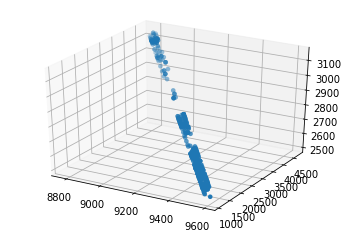

In [5]:
# PLOT ALL NEURONS IN PROBE

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(xyz[0], xyz[1], xyz[2], linewidth=0.1)

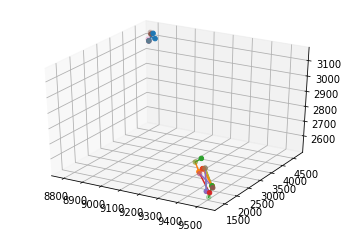

In [6]:
# PLOT JUST THE CONNECTED NEURONS using MATPLOTLIB
connections = [(187, 234),
 (150, 66),
 (362, 66),
 (13, 107),
 (13, 19),
 (325, 126),
 (88, 316),
 (88, 99),
 (336, 126),
 (120, 126),
 (251, 99),
 (19, 335),
 (19, 343),
 (335, 86),
 (120, 126),
 (117, 345)]

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

for (i,j) in connections:  # plot a line between each pair
    xi,yi,zi = good_indices_probe1_channel_just3d[i]
    xj,yj,zj = good_indices_probe1_channel_just3d[j]
    ax.plot3D([xi,xj], [yi,yj], [zi, zj])
    ax.scatter([xi,xj], [yi,yj], [zi, zj])

In [7]:
import json
from urllib.request import urlopen
import requests
import urllib.request
import igraph as ig

import chart_studio.plotly as py
from plotly.offline import iplot
import plotly.graph_objs as go


In [30]:
### GET COORDINATES OF NEURONS AND OF EDGES CONNECTED BIDIRECTIONALLY###
connections = [(187, 234),
 (150, 66),
 (362, 66),
 (13, 107),
 (13, 19),
 (325, 126),
 (88, 316),
 (88, 99),
 (336, 126),
 (120, 126),
 (251, 99),
 (19, 335),
 (19, 343),
 (335, 86),
 (120, 126),
 (117, 345)]

### GET NODES
tuple_neurons = list(zip(*connections))
neurons = list(set([i for sub in tuple_neurons for i in sub]))

xyz_bidirectional_neurons = [np.array(i) for i in zip(*good_indices_probe1_channel_just3d[neurons])]

### GET BRAIN LOCATION 
locations = np.array([str(i[3],'utf-8') for i in good_indices_probe1_channel_locations])
locations_bidirectional = locations[neurons]

## GET COLORS TO MATCH BRAIN LOCATION
ind_locations = list(set(locations_bidirectional))

colors = []
for loc in locations_bidirectional:
    colors.append((ind_locations.index(loc)+1) * 1/len(ind_locations))
print(colors)

### GET EDGES
xe = []
ye = []
ze = []
for i,j in connections:
    xe += [good_indices_probe1_channel_just3d[i][0],good_indices_probe1_channel_just3d[j][0],None]
    ye += [good_indices_probe1_channel_just3d[i][1],good_indices_probe1_channel_just3d[j][1],None]
    ze += [good_indices_probe1_channel_just3d[i][2],good_indices_probe1_channel_just3d[j][2],None]

### GET ALL CONNECTIONS FOR ALL NEURONS ### 
#probe1_371 = np.loadtxt("W_py_5400.csv", delimiter=",")

[0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5]


In [66]:
layt=ig.Layout(coords=list(good_indices_probe1_channel_just3d[neurons]))

trace1=go.Scatter3d(x=xe, y=ye, z=ze, mode='lines', line=dict(color='rgb(125,125,125)', width=1),hoverinfo='none', name="functional connections")

trace2=go.Scatter3d(x=xyz_bidirectional_neurons[0], y=xyz_bidirectional_neurons[1], z=xyz_bidirectional_neurons[2], mode='markers',
                   marker=dict(symbol='circle', size=6, color=colors, colorscale='Viridis', 
                      line=dict(color='rgb(50,50,50)', width=0.5)), text=locations_bidirectional, hoverinfo='text', name="neurons")

data=[trace1, trace2]
fig=go.Figure(data=data)
iplot(fig, filename='Bi-directionally connected bursting neurons')

fig.write_html("bidirectional_location.html")

In [63]:
def get_location_plot(positions, connections, savefile=None):
    """Plots a location of neurons in Allen common framework, colorcoded by location, with connection edges
        positions: [(x,y,z,brain_location)]
            x,y,z are coordinates in the Allen common framework
            brain_location is a string describing the brain location of a neuron
            - position(neuron[i]) = positions[i]
        connections: [(source,target)]
            source/target is the index of the source/target neuron in the connection. 
            the source/target indices correspond to the indexes in the connection touples  
    """
    
    ### GET EDGES
    xe = []
    ye = []
    ze = []
    ws = []
    for i,j,w in connections:
        xe += [positions[i][0],positions[j][0],None]
        ye += [positions[i][1],positions[j][1],None]
        ze += [positions[i][2],positions[j][2],None]
        ws += w
    ### GET POSITIONS, leaving out brain_location string
    positions_just3d = np.array([(x,y,z) for (x,y,z,_) in positions])
    xyz = [np.array(i) for i in zip(*positions_just3d)]

    ### GET BRAIN LOCATION labels
    locations = np.array([l for (_,_,_,l) in positions])

    ## GET COLORS TO MATCH BRAIN LOCATION
    ind_locations = list(set(locations))

    colors = []
    for loc in locations:
        colors.append((ind_locations.index(loc)+1) * 1/len(ind_locations))

    ## PLOTTING
    layt=ig.Layout(coords=list(positions_just3d))

    trace1=go.Scatter3d(x=xe, y=ye, z=ze, mode='lines', line=dict(color='rgb(125,125,125)', width=1),text=ws, hoverinfo='text', name='functional connections')

    trace2=go.Scatter3d(x=xyz[0], y=xyz[1], z=xyz[2], mode='markers',
                    marker=dict(symbol='circle', size=6, color=colors, colorscale='Viridis', 
                        line=dict(color='rgb(50,50,50)', width=0.5)), text=locations, hoverinfo='text', name='neurons')

    data=[trace1, trace2]
    fig=go.Figure(data=data)
    
    iplot(fig)

    if savefile is not None:

        fig.write_html(savefile)

In [50]:
def get_connections(connection_matrix):
    connections = []
    for i in range(connection_matrix.shape[0]):
        tos = np.nonzero(connection_matrix[i])[0]
        for t in tos:
            connections.append((i, t, connection_matrix[i,t]))
    return connections



In [64]:
probe1_371 = np.loadtxt("results/connectivity_Cori_2016-12-14_probe1/W_py_5400.csv", delimiter=",")
connections = get_connections(probe1_371)
get_location_plot(good_indices_probe1_channel_locations, connections, "networks/cori_2016-12-14_probe1.html")

In [47]:
np.nonzero(np.array([1,2,3]))

(array([0, 1, 2]),)